### Analysing Olympics Games data and trying to understand India's performance

In [462]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [463]:
os.chdir("/Users/anon/GitHubRepos/India_Olympics/Data/")

In [464]:
pd.options.mode.chained_assignment = None  # default='warn'

#### Reading the files

In [465]:
olympics_data = pd.read_csv("athlete_events.csv")
gdp_data = pd.read_csv("GDP_data.csv", skiprows = 4)
list_of_countries = pd.read_csv("world_countries.csv")

In [466]:
## Dropping the unwanted columns from the list_of_countries dataframe and then converting it to a list
list_of_countries.drop(list_of_countries.columns[1:], axis = 1, inplace = True)
countries_list = list_of_countries['Country'].tolist()

In [467]:
## To remove the trailing whitespaces in the country names
countries_list = [country.strip() for country in countries_list]

In [392]:
gdp_data.shape
gdp_data.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN


In [393]:
olympics_data.shape
olympics_data.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [468]:
## Sorting the Olympics dataframe by year 
olympics_data.sort_values(by = 'Year', inplace = True)

In [469]:
## Checking the number of rows with Medal column as zero
olympics_data['Medal'].isnull().sum(axis=0)

231333

In [470]:
## Creating a new df with only the rows with Medal column not zero
medal_countries = olympics_data[olympics_data['Medal'].notnull()]

## Creating a new df with countries and their number of medals won
medal_countries_trim = medal_countries.groupby(['Team'])['Medal'].size().reset_index()

In [471]:
medal_countries_trim.head(3)

,Team,Medal
0,A North American Team,4
1,Afghanistan,2
2,Algeria,17


#### just exploring the data - need not be part of the final code

In [293]:
## Looking at countries with the string United in it
medal_countries_trim.loc[medal_countries_trim['Team'].str.contains('United')]

medal_countries_trim.loc[medal_countries_trim['Team']=='India']


## there seems to be some redundant country names - for instance, United States-4

,Team,Medal
203,India,197


#### Focussing on results after 1960

In [557]:
## creating a dataframe from year 1960 onwards
games_after_1960 = olympics_data.loc[olympics_data['Year']>=1960]
##games_after_1960.shape

In [558]:
## Just exploring - looking at the values of the country fields
country_list = games_after_1960['Team'].unique()
np.sort(country_list)

array(['Acipactli', 'Afghanistan', 'Akatonbo', 'Alain IV', 'Albania',
       'Aldebaran', 'Aldebaran II', 'Aletta', 'Algeria', 'Ali-Baba IX',
       'Ali-Baba VI', 'Almaz', 'American Samoa', 'Andorra', 'Andromeda',
       'Angola', 'Antigua and Barbuda', 'Aphrodite', 'Ardilla',
       'Argentina', 'Argentina-1', 'Argentina-2', 'Argeste', 'Argo II',
       'Armenia', 'Aruba', 'Astrid III', 'Australia', 'Australia-1',
       'Australia-2', 'Australia-3', 'Austria', 'Austria-1', 'Austria-2',
       'Azerbaijan', 'Baccara', 'Bahamas', 'Bahrain', 'Bajazzo',
       'Balaton', 'Ballerina IV', 'Bangladesh', 'Barbados',
       'Barco Deloro', 'Barrenjoey', 'Beaver', 'Belarus', 'Belarus-1',
       'Belarus-2', 'Belgium', 'Belize', 'Bella', 'Bellatrix IX',
       'Bellatrix XIII', 'Benin', 'Bermuda', 'Bermudes', 'Bermudian',
       'Bhutan', 'Bim', 'Bingo', 'Bolivia', 'Bonaparte', 'Boreas',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brazil-1',
       'Brazil-2', 'Brentina', 'Briar', 

In [559]:
countries_list.extend(['Montenegro','Bahamas','Congo (Brazzaville)','Yugoslavia','Refugee Olympic Athletes','Central African Republic','Gambia','Kosovo','Individual Olympic Athletes','Federated States of Micronesia','Guinea Bissau','Palestine','British Virgin Islands','Sao Tome and Principe','South Sudan'])

In [560]:
#countries_list

In [564]:
## Checking the names of the countries which are in the Olympics dataframe but not in the countries list
games_after_1960.loc[~games_after_1960['Team'].isin(countries_list),'Team'].unique()
#games_after_1960['Team'].isin(list_of_countries['Country'])

array(['Beaver', 'Malaya', 'Buraddoo', 'Tango', 'Aldebaran II',
       'Ciocca III', 'Inga-Lill XXXXIII', 'Combine', 'May-Be 1960',
       'Rhodesia', 'Tengiri', 'Chamukina', 'Cha-Cha III', 'Bronia',
       'Evita VI', 'Ali-Baba VI', 'Lett', 'Galejan', 'Surprise',
       'Snowten III', 'John B', 'Persey', 'Calypse II', 'Lasha',
       'Bajazzo', 'West Indies Federation', 'SagaII', 'Gem VII',
       'United Arab Republic', 'Astrid III', 'Patricia', 'Voloira II',
       'Viktoriya', 'Macky VI', 'Daisy', 'Spirit VI', 'Peri', 'Pakaria',
       'Minotaur', 'Fantasio III', 'Trintel II', 'Three Leaves', 'Rififi',
       'Skum', "Ma'Lindo", 'Ardilla', 'Siames-Cat', 'Gabbiano', 'Sirene',
       'Nirefs', 'Vim III', 'Nokaut II', 'Pasodoble', 'Mizar',
       'Ballerina IV', 'Tornado', 'Dinah V', 'Partenope', 'Yeoman VII',
       'Maid of Lebanon', 'Tajamar', 'Espuma del Mar', 'Harmony',
       'Calcinhas', 'Mad Dog', 'Sjovinge', 'Pimm', 'Falcon VI', 'Struten',
       'Salamander', 'Posillipo III'

In [403]:
#'Czech Republic' in countries_list

True

In [561]:
## There are a lot valid entries - just a mismatch due to the different possible names for the country. For instance
## Great Britain and United Kingdom are same. So replacing all the Olympic dataframe entries to match with the 
## countries list

games_after_1960['Team'] = games_after_1960['Team'].str.replace("Great Britain", "United Kingdom")
games_after_1960['Team'] = games_after_1960['Team'].str.replace("Soviet Union", "Russia")
games_after_1960['Team'] = games_after_1960['Team'].str.replace("South Korea", "Korea, South")
games_after_1960['Team'] = games_after_1960['Team'].str.replace("North Korea", "Korea, North")
games_after_1960['Team'] = games_after_1960['Team'].str.replace("Chinese Taipei", "Taiwan")

In [562]:
games_after_1960['Team'] = games_after_1960['Team'].str.replace("Trinidad and Tobago", "Trinidad & Tobago")
games_after_1960['Team'] = games_after_1960['Team'].str.replace("Czechoslovakia", "Czech Republic")
games_after_1960['Team'] = games_after_1960['Team'].str.replace("Antigua and Barbuda", "Antigua & Barbuda")
games_after_1960['Team'] = games_after_1960['Team'].str.replace("United States Virgin Islands", "United States")
games_after_1960['Team'] = games_after_1960['Team'].str.replace("Myanmar", "Burma")
#games_after_1960['Team'] = games_after_1960['Team'].str.replace("Bahamas", "Bahamas, The")
games_after_1960['Team'] = games_after_1960['Team'].str.replace("Bosnia and Herzegovina", "Bosnia & Herzegovina")
games_after_1960['Team'] = games_after_1960['Team'].str.replace("Saint Kitts and Nevis", "Saint Kitts & Nevis")
games_after_1960['Team'] = games_after_1960['Team'].str.replace("East Germany", "Germany")
games_after_1960['Team'] = games_after_1960['Team'].str.replace("West Germany", "Germany")

In [563]:
## This is for the redundant entries where a number follows the country name. For instance, United States-1
pattern = r'-\d+'
games_after_1960['Team'] = games_after_1960['Team'].str.replace(pattern, "", regex = True)

In [565]:
### Now the remaining entries which are in Olympics but not in the countries list are named as others
games_after_1960.loc[~games_after_1960['Team'].isin(countries_list),'Team']='Others'

In [566]:
medals_after_1960 = games_after_1960[games_after_1960['Medal'].notnull()]

In [567]:
medals_after_1960.shape

(28400, 15)

In [568]:
## Removing the rows corresponding to winter games
medals_after_1960.drop(medals_after_1960[medals_after_1960['Games'].str.contains('Winter')].index, inplace = True)

In [569]:
medals_after_1960.shape

(23545, 15)

### Lets do some Visualization

In [570]:
## This will account for team events getting multiple medals. By taking the unique color of the medal for an event, 
## tackle this issue
medal_list = medals_after_1960.groupby(['Year','Team','Event'])['Medal'].nunique().reset_index()

In [571]:
## Testing for United States for a particular event and it turns out fine. The multiple values for an event for 
## a team in a year happens only when multiple colors are won

#medals_after_1960.loc[(medals_after_1960['Team']=='United States')&(medals_after_1960['Event']=="Athletics Men's 110 metres Hurdles")&(medals_after_1960['Year']==1960)]

In [572]:
## Now finding the total count of medals won by a country in a year (considering team event mmedsals as one medal)
## this can be done by finding the count of the medals in a year for a team - can go group by
medal_list_year_total = medal_list.groupby(['Year','Team']).sum().reset_index()

In [577]:
medal_list_total = medal_list_year_total.groupby(['Team'])['Medal'].sum().reset_index()

In [578]:
medal_list_total.sort_values(by = 'Medal', inplace = True, ascending = False)

In [580]:
medal_list_total.head(3)

,Team,Medal
126,United States,1453
98,Russia,1288
41,Germany,1081


In [585]:
medal_list_total['proportion'] = round(medal_list_total['Medal']*100/(sum(medal_list_total['Medal'])),2)

In [587]:
medal_list_total['cumsum'] = medal_list_total['proportion'].cumsum()

In [588]:
medal_list_total

,Team,Medal,proportion,cumsum
126,United States,1453,13.03,13.03
98,Russia,1288,11.55,24.58
41,Germany,1081,9.69,34.27
20,China,542,4.86,39.13
125,United Kingdom,436,3.91,43.04
4,Australia,411,3.68,46.72
57,Italy,373,3.34,50.06
38,France,370,3.32,53.38
59,Japan,366,3.28,56.66
48,Hungary,315,2.82,59.48


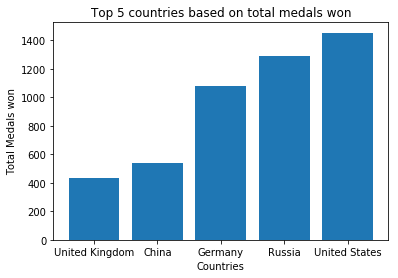

In [575]:
plt.bar(medal_list_total.iloc[-5:,0], medal_list_total.iloc[-5:,1])
plt.xlabel("Countries")
plt.ylabel("Total Medals won")
plt.title("Top 5 countries based on total medals won")
plt.show()

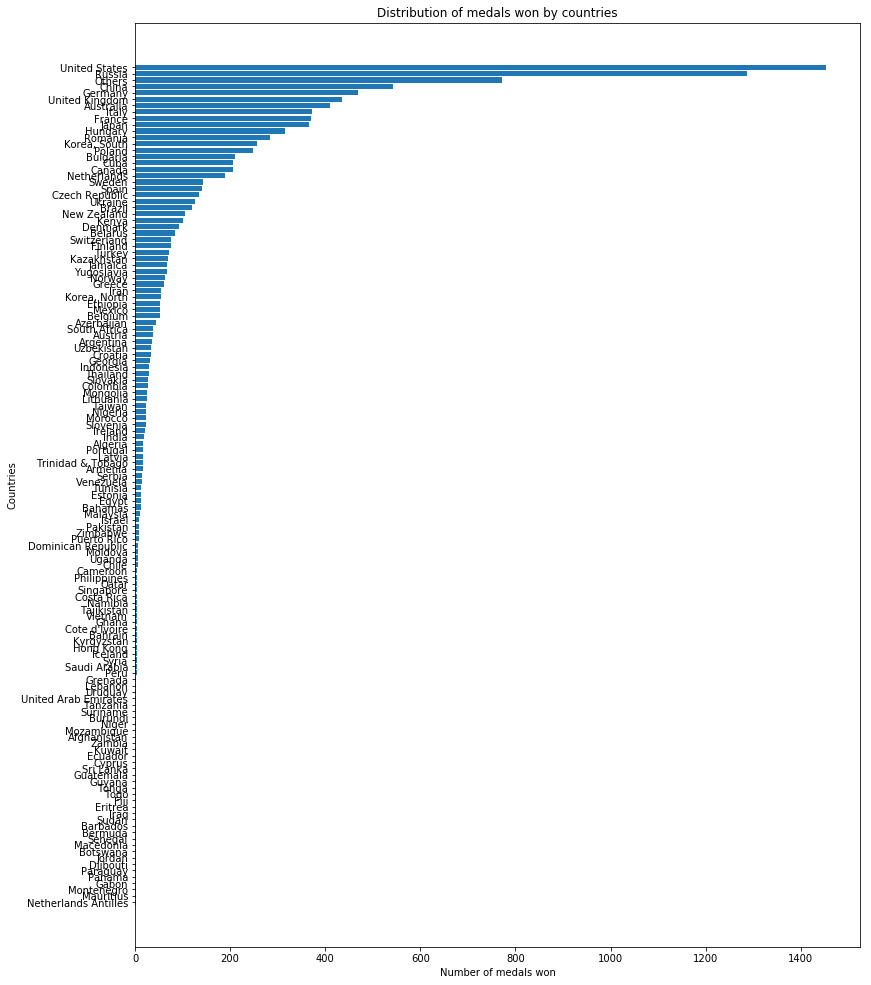

In [538]:
plt.figure(figsize=(13,17))
plt.barh(medal_list_total.iloc[:,0], medal_list_total.iloc[:,1])
plt.xlabel("Number of medals won")
plt.ylabel("Countries")
plt.title("Distribution of medals won by countries")
plt.tight_layout()
plt.show()

In [535]:
medal_list_total.tail(5)

,Team,Medal
41,Germany,468
20,China,542
85,Others,771
96,Russia,1288
124,United States,1453
